In [40]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize as opt
from scipy.optimize import minimize
%matplotlib inline

In [41]:
def func(z, z0):
    return np.tan(z) - np.sqrt((z0/z)**2 - 1)

#finding z0
a = 3
V0 = 3
h_bar = 1
m = 1

z0 = a*np.sqrt(2*m*V0)/h_bar

#calculating roots
res = opt.root(func, [1.4, 4.0, 6.2], args = (z0, ))
res.x

#output
array([1.38165158, 4.11759958, 6.70483966])

NameError: name 'array' is not defined

In [42]:
def opt_fun(x, c):
    return (np.cos(x)/x - c)**2

const = 1.2
res = minimize(lambda x: opt_fun(x, const), x0=0.001)

# Check if the optimization was successful
print(res.success)
# >> True

# Extract the root from the minimization result
print(res.x[0])
# >> 0.65889256782472172

True
0.6588925678247217


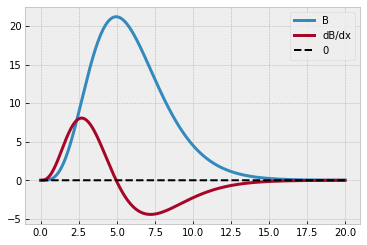

In [43]:
def bx(x):
    return (x**5/(np.exp(x)-1))

def dbdx(x):
    return( x**4 * ((5-x)*np.exp(x)-5) / (np.exp(x)-1)**2 )

x=np.arange(0.01,20,0.01)

plt.plot(x, bx(x), lw=3)

plt.plot(x, dbdx(x), lw=3)

plt.plot(x, 0*x, 'k--')

plt.legend(['B', 'dB/dx', '0'])

As this is a transcendent equation, finding all roots is not an option. You cannot (in general) find an expression that gives a closed-form for the roots of the equation. So you need to do some analysis first. Plotting the function, or plotting the left-hand-side and right-hand-side of the equation (and hence, the intersections of both curves are the roots) will give you some hints on how to tackle the problem

[3.93876000e-08 3.94395969e-08 3.94915252e-08 ... 8.80268007e-08
 8.80500789e-08 8.80733511e-08]


C:\Users\Luke\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Luke\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide


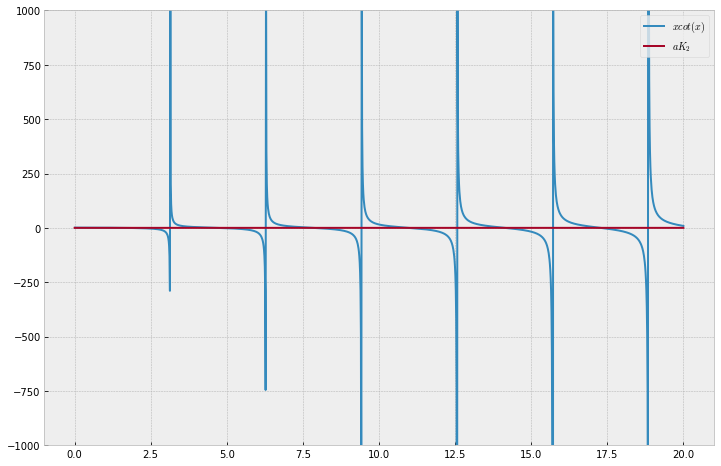

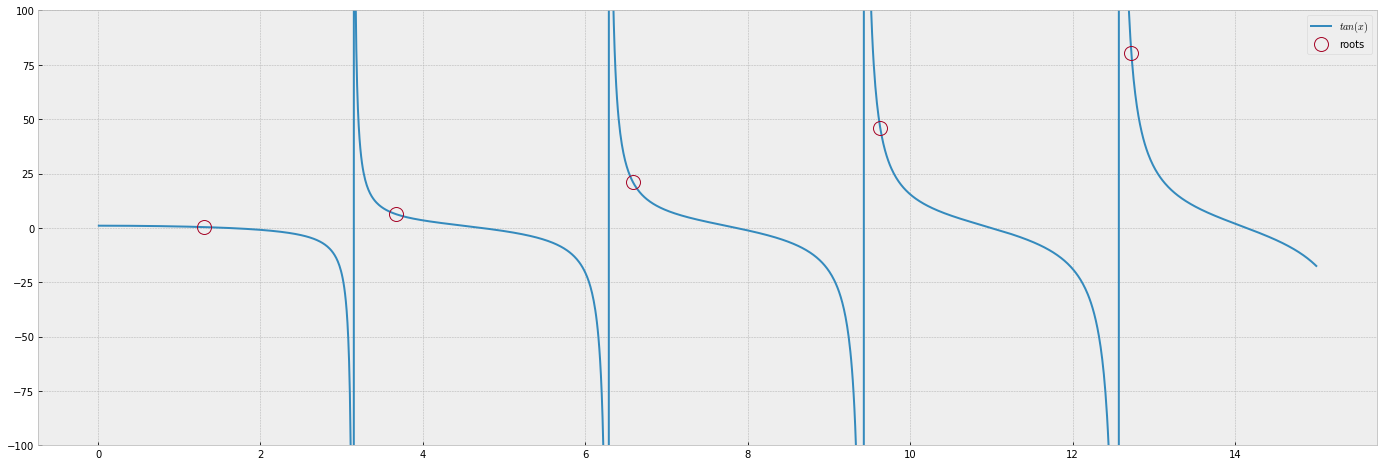

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

m = 1875.6e6
h = (6.5821e-16)**(2)
a = 2.1e-17
E = np.linspace(h/2*m,5*h/2*m,101*15)

k = np.sqrt(2*m*E/h)*a

print(k)

plt.figure(figsize=(12,8))
plt.style.use('bmh')
x = np.linspace(0,20,101*15)
plt.ylim(-1000,1000)
plt.plot(x,x/np.tan(x),label='$xcot(x)$')
plt.plot(x,k,label='$aK_2$')
plt.legend(loc=1)
plt.savefig('fun.png',dpi=300,bbox_inches = 'tight')

def f(x):
    # The function
    return np.tan(x)-2*x/(x*x-1)


def roots(N):
    # Find N roots of the equation
    #Allocate space
    roots = np.zeros(N)
    #Margin to stay away from poles
    margin = 1e-8
    
    #First root
    roots[0] = brentq(f, 1.0 + margin, np.pi/2 - margin, rtol=1e-14)

    #Subsequent N-1 roots
    for i in range(1,N):
        left = (2*i - 1)*np.pi/2
        right = (2*i + 1)*np.pi/2
        roots[i] = brentq(f, left + margin, right - margin, rtol = 1e-14)

    return roots 

result = roots(1000)

left = 0
right = 15


plt.figure(figsize=(24,8))
plt.style.use('bmh')
x = np.linspace(left,right,(right-left)*101)
plt.ylim(-100,100)
plt.plot(x,x/np.tan(x),label='$tan(x)$')
#plt.plot(x,k,label='$aK_2$')
rts = result[result>=left]
rts = rts[rts<=right]
plt.plot(rts,rts/np.tan(rts),'o', markersize=14, fillstyle='none', label='roots')
plt.legend(loc=1)
plt.savefig('roots1.png',dpi=300,bbox_inches = 'tight')

In [54]:
print(roots)

<function roots at 0x00000212F2591950>


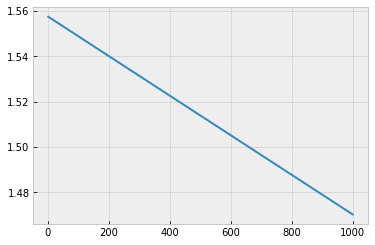

In [72]:
x = [1,1000]
plt.plot(x,np.tan(x))